In [1]:
import gizeh
import numpy as np


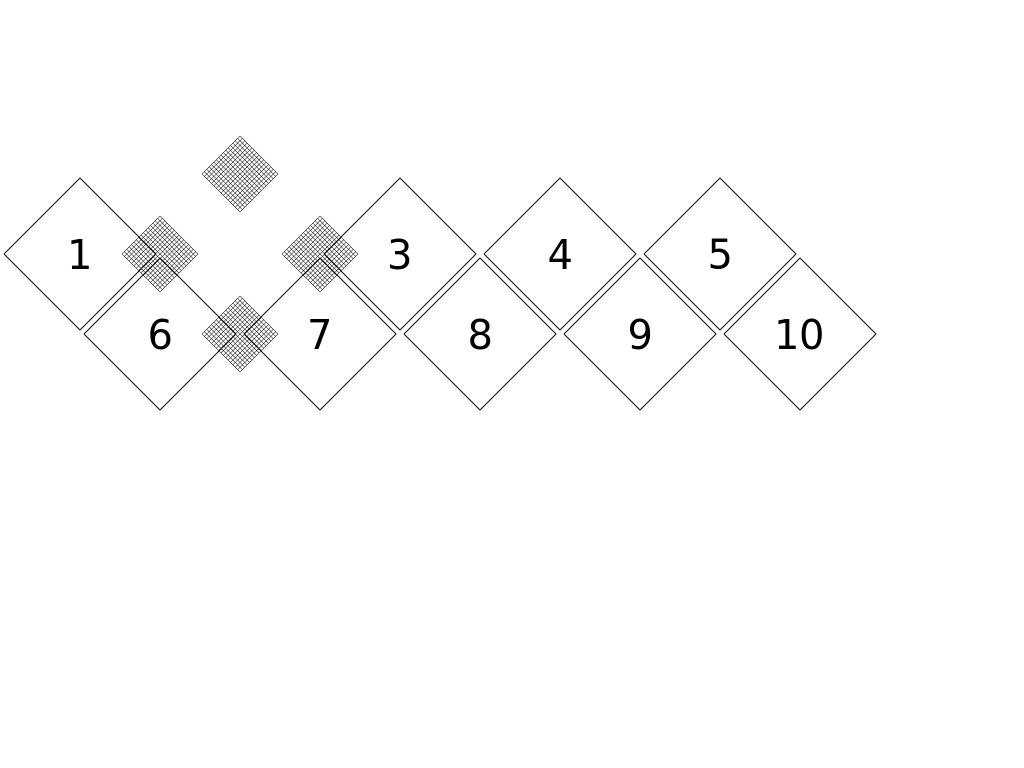

In [47]:
surface = gizeh.Surface(width=1024, height=768) # in pixels

basis = np.array([[80.0,80.0],[80.0,-80.0]])

rhomb_coords = np.array([[0.0,0.0],
                        [0.0,1.0],
                        [1.0,1.0],
                        [1.0,0.0],
                        [0.0,0.0]])

rhomb_coords = rhomb_coords - np.array([0.5,0.5])
rhomb_t = np.matmul( basis, rhomb_coords.T ).T

rhomb = gizeh.polyline( rhomb_t, stroke_width = 1, stroke=(0,0,0) )

def grid(basis):
    origin = -0.5*(basis[0]+basis[1])
    
    gr = []
    for i in range(16+1):       
        p1 = i/16.0*basis[0] - 0.5*basis[1] - 0.5*basis[0]
        p2 = i/16.0*basis[0] + 0.5*basis[1] - 0.5*basis[0]
        #p1 = -basis[0] + i/16.0*basis[0] - 0.5*basis[1]
        #p2 = -basis[0] + i/16.0*basis[0] + 0.5*basis[1]
        l = gizeh.polyline( [p1,p2], stroke_width = 1, stroke=(0,0,0) )
        gr.append(l)
            
        p1 = i/16.0*basis[1] - 0.5*basis[0] - 0.5*basis[1]
        p2 = i/16.0*basis[1] + 0.5*basis[0] - 0.5*basis[1]
        l = gizeh.polyline( [p1,p2], stroke_width = 1, stroke=(0,0,0) )
        gr.append(l)
    
    g = gizeh.Group(gr)
    return g
    
#grd = grid(basis)
#grd = grd.scale(0.95)
#grd = grd.translate(xy=[512,334])
#grd.draw(surface)


#rhomb_1 = rhomb.translate(xy=[512,334])

rhombis = []
rhombi_num = []
idx = 0
for i in range(5):
    idx += 1
    
    if idx == 2:
        grd1 = grid(basis)
        grd1 = grd1.scale(0.5*0.95)
        grd1 = grd1.translate(xy=0.5*basis[0] + 0.5*basis[1])
        
        grd2 = grid(basis)
        grd2 = grd2.scale(0.5*0.95)
        grd2 = grd2.translate(xy=0.5*basis[0]-0.5*basis[1])
        
        grd3 = grid(basis)
        grd3 = grd3.scale(0.5*0.95)
        grd3 = grd3.translate(xy=-0.5*basis[0]+0.5*basis[1])
        
        grd4 = grid(basis)
        grd4 = grd4.scale(0.5*0.95)
        grd4 = grd4.translate(xy=-0.5*basis[0]-0.5*basis[1])

        grid_group = gizeh.Group([grd1, grd2, grd3, grd4])
        grid_group = grid_group.translate(xy=basis[1] + i*(basis[0]+basis[1]))
        
        
        
        rhombis.append(grid_group)
    else:
        r = rhomb.scale(0.95)
    
        n = gizeh.text(str(idx),fontfamily="Impact", fontsize=40)
        g = gizeh.Group([n,r])
        g = g.translate(xy=basis[1] + i*(basis[0]+basis[1]))
        rhombis.append(g)
    
for i in range(5):
    idx += 1
    r = rhomb.scale(0.95)
    n = gizeh.text(str(idx),fontfamily="Impact",  fontsize=40)
    g = gizeh.Group([n,r])
    g = g.translate(xy=basis[0]+basis[1] + i*(basis[0]+basis[1]))
    rhombis.append(g)
    
    
    
g = gizeh.Group(rhombis +rhombi_num)
g = g.translate(xy=[0,334])
g.draw(surface)
#rhomb_1.draw(surface)

surface.ipython_display()